In [ ]:
import numpy as np

In [ ]:
import plotly

In [ ]:
import data_xray

In [1]:
from data_xray import file_io as fio

In [3]:
fio.GetData.find_grids("/Users/5nm/Dropbox (ORNL)/JSTM/Data - JTSTM/2021-07-09 Large vortex map on FeSe", get_data=False)

266it [00:00, 3147.55it/s]


['/Users/5nm/Dropbox (ORNL)/JSTM/Data - JTSTM/2021-07-09 Large vortex map on FeSe/20210714_Subgrid_001.3ds',
 '/Users/5nm/Dropbox (ORNL)/JSTM/Data - JTSTM/2021-07-09 Large vortex map on FeSe/20210714_Subgrid_002.3ds']

In [3]:
dat.FindGrids("/Users/5nm/Dropbox (ORNL)/JSTM/Data - JTSTM/2021-07-09 Large vortex map on FeSe", get_data=False)

266it [00:00, 2367.75it/s]


['/Users/5nm/Dropbox (ORNL)/JSTM/Data - JTSTM/2021-07-09 Large vortex map on FeSe/20210714_Subgrid_001.3ds',
 '/Users/5nm/Dropbox (ORNL)/JSTM/Data - JTSTM/2021-07-09 Large vortex map on FeSe/20210714_Subgrid_002.3ds']

In [4]:
dat.SelectFolder()

'/Users/5nm/Documents/GitHub'

In [39]:
fio.GetData

AttributeError: module 'data_xray.file_io' has no attribute 'GetData'

In [ ]:
from data_xray import nanonisio as nio
import data_xray as dx
from data_xray import file_io as fio
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [ ]:
grids = dx.file_io.FindGrids("/Users/5nm/Dropbox (ORNL)/JSTM/Data - JTSTM/2021-07-09 Large vortex map on FeSe");

In [ ]:
grids[0].ds

In [ ]:
grids[0].ds.cf[:,:,9].plot()

In [ ]:
import plotly.express as px

In [ ]:
px.imshow(grids[0].ds.cf,animation_frame='bias')

In [ ]:
dx.file_io.GetFile()

In [ ]:
_

In [ ]:
_[0]

In [ ]:
a = 2 if 1 > 0 else 3

In [ ]:
a

In [1]:
import numpy as np

In [72]:
class hello:
    def __init__(self, message='hello'):
        self.message = message
    
    def doit(self):
        print(self.message)
    
    @classmethod
    def doitnow(cls, message):
        a = cls("wow")
        a.doit()
        print(message)
    
    @staticmethod
    def doitStatic(message):
        print(message)

In [73]:
hello.doitStatic("hello")

hello


In [69]:
hello().__dict__

{'message': 'hello'}

In [70]:
hello.doitnow("hello")

wow
hello


In [1]:
%pip install tensorflow

     |████████████████████████████████| 199.0 MB 7.1 MB/s 
     |████████████████████████████████| 5.6 MB 5.7 MB/s 
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 462 kB 14.8 MB/s 
     |████████████████████████████████| 132 kB 17.4 MB/s 
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 2.9 MB 13.6 MB/s 
     |████████████████████████████████| 4.0 MB 6.3 MB/s 
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 15.6 MB 42 kB/s 
     |████████████████████████████████| 1.0 MB 6.7 MB/s 
     |████████████████████████████████| 1.3 MB 42.3 MB/s 
     |████████████████████████████████| 152 kB 11.4 MB/s 
     |████████████████████████████████| 3.5 MB 15.5 MB/s 
     |████████████████████████████████| 781 kB 13.9 MB/s 
     |███████

In [2]:
%pip install probflow

     |████████████████████████████████| 93 kB 532 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Imports
import probflow as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
randn = lambda *x: np.random.randn(*x).astype('float32')

# Generate some data
x = randn(100)
y = 2*(x**2) -1 + randn(100)

# Plot it
plt.plot(x, y, '.')


In [38]:
class SimpleLinearRegression(pf.ContinuousModel):

    def __init__(self):
        self.w = pf.Parameter(name='Weight')
        self.b = pf.Parameter(name='Bias')
        self.s = pf.ScaleParameter(name='Std')

    def __call__(self, x):
        return pf.Normal((x*self.w())**2+self.b(), self.s())

In [39]:
model = SimpleLinearRegression()
model.fit(x, y)

In [40]:
# Make predictions
x_test = np.array([-3, 3]).astype('float32')
preds = model.predict(x_test)

# Plot em
plt.plot(x_test, preds, 'r')
plt.plot(x, y, '.')


In [41]:
model.residuals_plot(x, y)

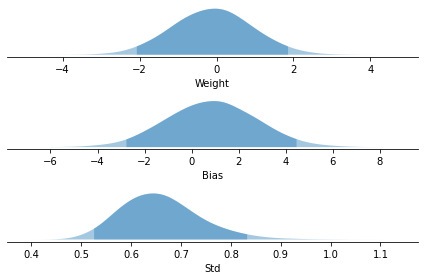

In [42]:
model.posterior_plot(ci=0.95)

In [43]:
# Compute 95% predictive confidence intervals
x_eval = np.linspace(-3, 3, 100).astype('float32')
lb, ub = model.predictive_interval(x_eval, ci=0.9)

# Plot em
plt.fill_between(x_eval, lb, ub, alpha=0.2)
plt.plot(x, y, '.')


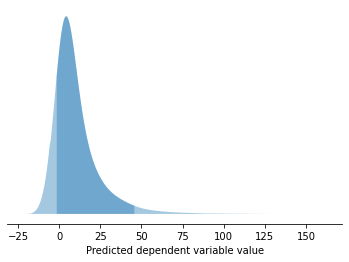

In [44]:
model.pred_dist_plot(x_eval[:1], ci=0.95)

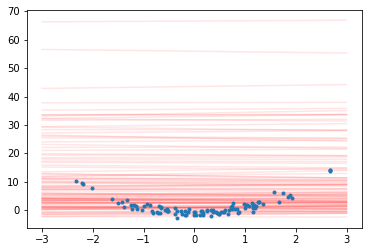

In [45]:
# Draw sample fits from the model
x_eval = np.array([-3, 3]).astype('float32')
samples = model.predictive_sample(x_eval, n=100)

# Plot em
x_plot = np.broadcast_to(x_eval[:, np.newaxis], samples.T.shape)
plt.plot(x_plot, samples.T, 'r', alpha=0.1)
plt.plot(x, y, '.')


In [51]:
model.r_squared_plot(x, y)

InvalidArgumentError: In[0] mismatch In[1] shape: 100 vs. 1: [1,100] [1000,1,32] 0 0 [Op:BatchMatMulV2]

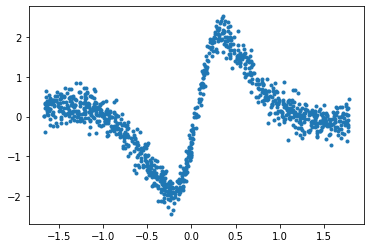

In [90]:
# Imports
import probflow as pf
import numpy as np
import matplotlib.pyplot as plt
rand = lambda *x: np.random.rand(*x).astype('float32')
randn = lambda *x: np.random.randn(*x).astype('float32')
zscore = lambda x: (x-np.mean(x, axis=0))/np.std(x, axis=0)

# Create the data
N = 1024
x = 10*rand(N, 1)-5
y = np.sin(x)/(1+x*x) + 0.05*randn(N, 1)

# Normalize
x = zscore(x)
y = zscore(y)

# Plot it
plt.plot(x, y, '.')

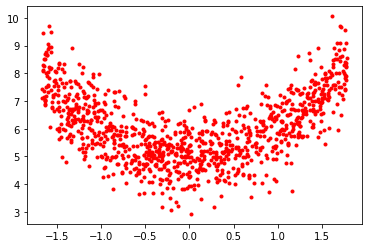

In [141]:
y = [xx**2 + 5 + .8*np.random.randn() for xx in x]
y = np.asarray(y).astype(np.float32)
plt.plot(x,y, 'r.')

In [142]:
plt.plot(x,y,'b.')

In [143]:
import tensorflow as tf

class DenseLayer(pf.Module):

    def __init__(self, d_in, d_out):
        self.w = pf.Parameter([d_in, d_out])
        self.b = pf.Parameter([1, d_out])

    def __call__(self, x):
        return x @ self.w() + self.b()

In [144]:
class DenseNetwork(pf.Module):

    def __init__(self, dims):
        Nl = len(dims)-1 #number of layers
        self.layers = [DenseLayer(dims[i], dims[i+1]) for i in range(Nl)]
        self.activations = (Nl-1)*[tf.nn.relu] + [lambda x: x]

    def __call__(self, x):
        for i in range(len(self.activations)):
            x = self.layers[i](x)
            x = self.activations[i](x)
        return x


In [145]:
class DenseRegression(pf.ContinuousModel):

    def __init__(self, dims):
        self.net = DenseNetwork(dims)
        self.s = pf.ScaleParameter([1, 1])

    def __call__(self, x):
        return pf.Normal(self.net(x), self.s())

In [132]:
model = DenseRegression([1, 20,20, 1])

In [133]:
model.fit(x, y, epochs=1000, lr=0.02)

In [146]:
# Test points to predict
x_test = np.linspace(min(x), max(x), 101).astype('float32').reshape(-1, 1)

# Predict them!
preds = model.predict(x_test)

# Plot it
plt.plot(x, y, '.', label='Data')
plt.plot(x_test, preds, 'r.', label='Predictions')


In [147]:
# Compute 95% confidence intervals
lb, ub = model.predictive_interval(x_test, ci=0.95)

# Plot em!
plt.fill_between(x_test[:, 0], lb[:, 0], ub[:, 0],
                 alpha=0.2, label='95% ci')
plt.plot(x, y, '.', label='Data')


probflow_trainer

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import probflow as pf


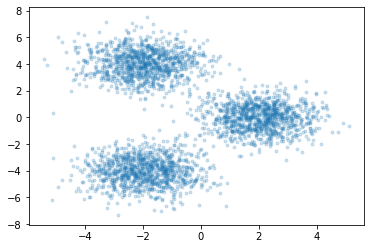

In [63]:
# Generate some data
N = 3*1024
X = np.random.randn(N, 2).astype('float32')
X[:1024, :] += [2, 0]
X[1024:2048, :] -= [2, 4]
X[2048:, :] += [-2, 4]

# Plot the data
plt.plot(X[:, 0], X[:, 1], '.', alpha=0.2)

In [64]:
class GaussianMixtureModel(pf.Model):

    def __init__(self, k, d):
        self.mu = pf.Parameter([k, d])
        self.sigma = pf.ScaleParameter([k, d])
        self.theta = pf.DirichletParameter(k)

    def __call__(self):
        dists = tfd.MultivariateNormalDiag(self.mu(), self.sigma())
        return pf.Mixture(dists, probs=self.theta())

In [65]:
model = GaussianMixtureModel(3, 2)
model.fit(X, lr=0.03, epochs=500, batch_size=1024)

NotImplementedError: in user code:

    /home/cades/anaconda3/lib/python3.8/site-packages/probflow/models/model.py:123 train_fn  *
        elbo_loss = self.elbo_loss(x_data, y_data, n, n_mc)
    /home/cades/anaconda3/lib/python3.8/site-packages/probflow/models/model.py:106 elbo_loss  **
        log_loss = self.log_likelihood(x_data, y_data) / nb / n_mc
    /home/cades/anaconda3/lib/python3.8/site-packages/probflow/models/model.py:82 log_likelihood
        log_likelihoods = self().log_prob(y_data)
    <ipython-input-64-55ed34e1fec3>:9 __call__
        dists = tfd.MultivariateNormalDiag(self.mu(), self.sigma())
    /home/cades/anaconda3/lib/python3.8/site-packages/probflow/parameters/parameter.py:25 wrapped_fn
        return fn(param)
    /home/cades/anaconda3/lib/python3.8/site-packages/probflow/parameters/parameter.py:195 __call__
        return self.transform(self.posterior.sample())
    /home/cades/anaconda3/lib/python3.8/site-packages/probflow/utils/base.py:96 sample
        return self().sample()
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/distributions/distribution.py:1002 sample
        return self._call_sample_n(sample_shape, seed, name, **kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/distributions/distribution.py:979 _call_sample_n
        samples = self._sample_n(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/internal/distribution_util.py:1364 _fn
        return fn(*args, **kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/distributions/gamma.py:243 _sample_n
        return random_gamma(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/distributions/gamma.py:660 random_gamma
        return random_gamma_with_runtime(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/distributions/gamma.py:654 random_gamma_with_runtime
        return _random_gamma_gradient(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/internal/custom_gradient.py:104 none_wrapper
        return f_wrapped(*trimmed_args, **kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/custom_gradient.py:261 __call__
        return self._d(self._f, a, k)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/custom_gradient.py:217 decorated
        return _graph_mode_decorator(wrapped, args, kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/custom_gradient.py:330 _graph_mode_decorator
        result, grad_fn = f(*args)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/internal/custom_gradient.py:92 f_wrapped
        val, aux = vjp_fwd(*reconstruct_args, **kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/distributions/gamma.py:541 _random_gamma_fwd
        samples, impl = _random_gamma_no_gradient(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/internal/implementation_selection.py:83 f_wrapped
        return f(*args, **kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py:828 __call__
        result = self._call(*args, **kwds)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py:862 _call
        results = self._stateful_fn(*args, **kwds)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:2941 __call__
        filtered_flat_args) = self._maybe_define_function(args, kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:3361 _maybe_define_function
        graph_function = self._create_graph_function(args, kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:3196 _create_graph_function
        func_graph_module.func_graph_from_py_func(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:990 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py:634 wrapped_fn
        out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/distributions/gamma.py:483 _random_gamma_no_gradient
        return sampler_impl(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow_probability/python/internal/implementation_selection.py:162 impl_selecting_fn
        function.register(defun_cpu_fn, **kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:3390 register
        concrete_func.add_gradient_functions_to_graph()
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:2057 add_gradient_functions_to_graph
        self._delayed_rewrite_functions.forward_backward())
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:631 forward_backward
        forward, backward = self._construct_forward_backward(num_doutputs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:674 _construct_forward_backward
        func_graph_module.func_graph_from_py_func(
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:990 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py:665 _backprop_function
        return gradients_util._GradientsHelper(  # pylint: disable=protected-access
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gradients_util.py:683 _GradientsHelper
        in_grads = _MaybeCompile(grad_scope, op, func_call,
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gradients_util.py:340 _MaybeCompile
        return grad_fn()  # Exit early
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gradients_util.py:684 <lambda>
        lambda: grad_fn(op, *out_grads))
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/random_grad.py:114 _StatelessRandomGammaV2Grad
        alpha_broadcastable = add_leading_unit_dimensions(alpha,
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/random_grad.py:35 add_leading_unit_dimensions
        [array_ops.ones([num_dimensions], dtype=dtypes.int32),
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:3120 ones
        output = _constant_if_small(one, shape, dtype, name)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2804 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    /home/cades/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3030 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    /home/cades/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    /home/cades/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:852 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (gradients/stateless_random_gamma/StatelessRandomGammaV2_grad/sub:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported
